In [1]:
# le basics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import strftime

# le mon creation
import env
import acquire as a
import prepare 
import explore as e
import model as m
from pprint import pprint

# for text digestion
import unicodedata
import re
import json
from bs4 import BeautifulSoup

# nltk: natural language toolkit -> tokenization, stopwords
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



# what's cookin', good lookin'?
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint


# Acquire

In [2]:
df_acquire = a.acquire_readmes()

In [3]:
df = df_acquire.copy()

In [4]:
df.head()

,repo,language,readme_contents
0,microsoft/terminal,C++,![terminal-logos](https://user-images.githubus...
1,microsoft/PowerToys,C#,# Microsoft PowerToys\n\n![Hero image for Micr...
2,huggingface/transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...
3,rust-lang/rust,Rust,# The Rust Programming Language\n\nThis is the...
4,mtdvio/every-programmer-should-know,NaN,> *[Join our community](https://metadevelopmen...


In [5]:
df.shape

(683, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             683 non-null    object
 1   language         619 non-null    object
 2   readme_contents  681 non-null    object
dtypes: object(3)
memory usage: 21.3+ KB


# Prepare

In [7]:
df_prepare = prepare.prep_df_for_nlp(df, 'readme_contents', extra_words = prepare.EXTRA_WORDS)

In [8]:
df = df_prepare.copy()

In [9]:
df.shape

(683, 8)

In [10]:
df.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,terminal,Other,![terminal-logos](https://user-images.githubus...,terminallogos welcome windows terminal console...,terminallogo welcom window termin consol comma...,terminallogos welcome window terminal console ...,microsoft,8152
1,PowerToys,Other,# Microsoft PowerToys\n\n![Hero image for Micr...,microsoft powertoys hero microsoft powertoys u...,microsoft powertoy hero microsoft powertoy use...,microsoft powertoys hero microsoft powertoys u...,microsoft,6486
2,transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface team rights reserve...,copyright 2020 huggingfac team right reserv li...,copyright 2020 huggingface team right reserved...,huggingface,37200
3,rust,Other,# The Rust Programming Language\n\nThis is the...,rust programming language main source code rep...,rust program languag main sourc code repositor...,rust programming language main source code rep...,rust-lang,5587
4,every programmer should know,Not Listed,> *[Join our community](https://metadevelopmen...,join community professional software developer...,join commun profession softwar develop get con...,join community professional software developer...,mtdvio,6397


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   repo             683 non-null    object  
 1   language         683 non-null    category
 2   readme_contents  683 non-null    object  
 3   clean            683 non-null    object  
 4   stem             683 non-null    object  
 5   lemmatized       683 non-null    object  
 6   username         683 non-null    object  
 7   lemmatized_len   683 non-null    int64   
dtypes: category(1), int64(1), object(6)
memory usage: 43.7+ KB


In [13]:
train, validate, test = prepare.split_data(df, 'language')

In [14]:
train

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
482,awesome actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532
646,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,872
474,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 src osquery s...,osqueri altosqueri logo width200 src osqueri s...,osquery altosquery logo width200 src osquery s...,osquery,3064
545,Best App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3646
539,actix web,Other,actix-web/README.md,actixweb readmemd,actixweb readmemd,actixweb readmemd,actix,17
...,...,...,...,...,...,...,...,...
47,sly,JavaScript,# [Sly](http://darsa.in/sly)\n\nJavaScript lib...,sly javascript library onedirectional scrollin...,sli javascript librari onedirect scroll item b...,sly javascript library onedirectional scrollin...,darsain,1238
268,free,Not Listed,更新时间 2023-01-12 00:00 \n所有免费节点都爬取自网络，请勿用于非法用途...,20230112 0000 android windows v2ray v2rayng v2...,20230112 0000 android window v2ray v2rayng v2r...,20230112 0000 android window v2ray v2rayng v2r...,freefq,13112
230,hello algorithm,Java,## 简介\n\nEnglish version repo and Gitbook is o...,english repo gitbook english branch part1 part...,english repo gitbook english branch part1 part...,english repo gitbook english branch part1 part...,geekxh,659
304,jq,Other,README.md,readmemd,readmemd,readmemd,stedolan,8


In [15]:
train.language.value_counts()

Other         147
JavaScript     94
Python         46
Not Listed     41
TypeScript     40
Go             38
Java           37
Name: language, dtype: int64

In [16]:
df = train.copy()

In [17]:
df.index = range(len(df.index))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   repo             443 non-null    object  
 1   language         443 non-null    category
 2   readme_contents  443 non-null    object  
 3   clean            443 non-null    object  
 4   stem             443 non-null    object  
 5   lemmatized       443 non-null    object  
 6   username         443 non-null    object  
 7   lemmatized_len   443 non-null    int64   
dtypes: category(1), int64(1), object(6)
memory usage: 25.1+ KB


# Explore based on Ryan's notebooks

# Top five languages

### make the following cell Code to generate language series

JavaScript_words_series = (' '.join(df[df.language == 'JavaScript']['readme_contents']))
Python_words_series = (' '.join(df[df.language == 'Python']['readme_contents']))
TypeScript_words_series = (' '.join(df[df.language == 'TypeScript']['readme_contents']))
Go_words_words_series = (' '.join(df[df.language == 'Go']['readme_contents']))
Java_words_series = (' '.join(df[df.language == 'Java']['readme_contents']))

all_words_series = (' '.join(df['readme_contents']))


# Thursday: Freqency of a word within a single readme

In [19]:
# plan have loop run through the contenct of every read me and count the words that are in that readme. 
# ham_words = clean(' '.join(df[df.label == 'ham']['text']))
# readme_words = join ['lemmatized'] but df.label = row
df.head()
## let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present
#ham_freq = pd.Series(ham_words).value_counts()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,awesome actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532
1,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,872
2,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 src osquery s...,osqueri altosqueri logo width200 src osqueri s...,osquery altosquery logo width200 src osquery s...,osquery,3064
3,Best App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3646
4,actix web,Other,actix-web/README.md,actixweb readmemd,actixweb readmemd,actixweb readmemd,actix,17


In [20]:
df.lemmatized.info()

<class 'pandas.core.series.Series'>
RangeIndex: 443 entries, 0 to 442
Series name: lemmatized
Non-Null Count  Dtype 
--------------  ----- 
443 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB


In [21]:
wnl = nltk.stem.WordNetLemmatizer()

In [22]:
lemmas = [wnl.lemmatize(word) for word in df.lemmatized[1]]

In [23]:
df1 = df.lemmatized.str.split().apply(lambda x: Counter(x))

In [24]:
df1 

0      {'awesome': 4, 'action': 165, 'github': 122, '...
1      {'instapy': 8, 'tooling': 1, 'automates': 1, '...
2      {'osquery': 12, 'altosquery': 1, 'logo': 1, 'w...
3      {'best': 1, 'app': 12, 'apps': 9, 'bestapp': 2...
4                         {'actixweb': 1, 'readmemd': 1}
                             ...                        
438    {'sly': 2, 'javascript': 1, 'library': 1, 'one...
439    {'20230112': 1, '0000': 1, 'android': 1, 'wind...
440    {'english': 2, 'repo': 1, 'gitbook': 1, 'branc...
441                                      {'readmemd': 1}
442    {'github': 10, 'license': 4, 'contributor': 1,...
Name: lemmatized, Length: 443, dtype: object

In [25]:
def lemm_counter(df):
    df.lemmatized.str.split().apply(lambda x: Counter(x))
    return df

In [26]:
ones = e.get_ngram_frequency(df.lemmatized)

In [27]:
freq_words = list(ones[ones >10].index)

In [28]:
# BEWARE THIS BOX IS REALLY LONG!!!!!

#for word in freq_words:
    #print(f'{word}\n----------------\n{df[df.lemmatized.str.contains(word)].index.value_counts()}\n')


In [29]:
print(type(df.lemmatized))

<class 'pandas.core.series.Series'>


#### beginning of block i want in loop

In [30]:
df.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,awesome actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532
1,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,872
2,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 src osquery s...,osqueri altosqueri logo width200 src osqueri s...,osquery altosquery logo width200 src osquery s...,osquery,3064
3,Best App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3646
4,actix web,Other,actix-web/README.md,actixweb readmemd,actixweb readmemd,actixweb readmemd,actix,17


In [31]:
row1 = df.lemmatized[1]

In [32]:
type(row1)

str

In [33]:
row1_series = pd.Series(row1)

#### end of block i want in loop

In [34]:
e.top_five_words(row1_series)

,word_1,count_1,word_2,count_2,word_3,count_3,word_4,count_4,word_5,count_5
0,instapy,8,talk,3,project,3,guide,3,community,3


In [35]:
# now to make a loop that runs through the rows of and converts the str of the lemmatized column into series


In [36]:
e.top_five_words(df.lemmatized)

,word_1,count_1,word_2,count_2,word_3,count_3,word_4,count_4,word_5,count_5
0,action,165,github,122,run,44,pr,41,file,31
1,instapy,8,talk,3,project,3,guide,3,community,3
2,release,14,osquery,12,sql,11,select,7,process,6
3,pro,20,999,15,app,12,499,11,apps,9
4,actixweb,1,readmemd,1,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
438,1,6,var,3,jquery,3,navigation,3,instance,3
439,vmess,32,trojan,2,v2ray,2,v2rayn,2,eyjhzgqioiaimtuumja0ljmxljyziiwgimfpzci6idasic...,1
440,04,3,english,2,pdf,2,09,2,01,2
441,readmemd,1,NaN,0,NaN,0,NaN,0,NaN,0


# looking into significance

## Moving into testing frequency per readme with TF-IDF

In [37]:
document = df.lemmatized[1]

In [38]:


# clean up the text
document = document.lower().replace(',', '').replace('.', '')
# transform into a series
words = pd.Series(document.split())

# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum()))


,raw_count,frequency
instapy,8,0.070175
talk,3,0.026316
project,3,0.026316
guide,3,0.026316
community,3,0.026316
...,...,...
doc,1,0.008772
full,1,0.008772
find,1,0.008772
learn,1,0.008772


In [39]:
row1 = df.lemmatized[1]
row1

'instapy tooling automates social medium interaction farm like comment follower instagram implemented python using selenium module twitter instapy talk automating instagram talk work listen talk python meepisode newsletter sign newsletter guide bot creation learn bot find full documentation doc table content run instapy installing instapy running instapy updating instapy guide tutorial video tutorial written guide external additionals tool running instapy documentation instapys feature credit credit community active supportive community every project need sustain together reached every continent country world thank part instapy community contributor project exists thanks people contribute contribute backer thank backer become backer disclaimer please note research project mean responsible usage use behalf im also responsible account get banned due extensive use'

In [40]:
type(row1)

str

In [41]:
words = pd.Series(row1.split())
words

0        instapy
1        tooling
2      automates
3         social
4         medium
         ...    
109          get
110       banned
111          due
112    extensive
113          use
Length: 114, dtype: object

# WORK FOR REPO TITLES

In [42]:
# is there significant indication of language in the title alone?
# titles will initally be lemmatized

In [43]:
df.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,awesome actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532
1,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,872
2,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 src osquery s...,osqueri altosqueri logo width200 src osqueri s...,osquery altosquery logo width200 src osquery s...,osquery,3064
3,Best App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3646
4,actix web,Other,actix-web/README.md,actixweb readmemd,actixweb readmemd,actixweb readmemd,actix,17


In [47]:
tok_name = prepare.tokenize('repo')

In [48]:
df['clean_title'] = df['repo'].apply(prepare.squeaky_clean)

## column for lemmatized repo names

In [49]:
df.head(1)

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len,clean_title
0,awesome actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532,awesome actions


In [50]:
df.shape

(443, 9)

In [55]:
df['clean_title'] = df['repo'].apply(prepare.squeaky_clean)

In [56]:
df['dirty_title'] = df['repo']

In [57]:
df_clean_title_count = df.groupby(['language'])['clean_title'].count()
df_clean_title_count

language
Go             38
Java           37
JavaScript     94
Not Listed     41
Other         147
Python         46
TypeScript     40
Name: clean_title, dtype: int64

In [58]:
df_clean_title_count = df.groupby(['language', 'clean_title'])['clean_title'].count()
df_clean_title_count

language    clean_title            
Go          12306                      0
            30 days javascript         0
            30 seconds css             0
            50projects50days           0
            955wlb                     0
                                      ..
TypeScript  youmightnotneedjquery      0
            zheng                      0
            zipline                    0
            zsh syntax highlighting    0
            zxing                      0
Name: clean_title, Length: 3087, dtype: int64

In [59]:
df_dirty_title_count = df.groupby(['language','dirty_title'])['dirty_title'].count()
df_dirty_title_count

language    dirty_title            
Go          12306                      0
            30 Days Of JavaScript      0
            30 seconds of css          0
            50projects50days           0
            955.WLB                    0
                                      ..
TypeScript  youmightnotneedjquery      0
            zheng                      0
            zipline                    0
            zsh syntax highlighting    0
            zxing                      0
Name: dirty_title, Length: 3101, dtype: int64

In [60]:
df.clean_title.str.split()

0      [awesome, actions]
1               [instapy]
2               [osquery]
3             [best, app]
4                 [actix]
              ...        
438                 [sly]
439                [free]
440    [hello, algorithm]
441                  [jq]
442      [dev, beginners]
Name: clean_title, Length: 443, dtype: object

### trying to clean digits out of list of strings that is the clean titles

In [61]:
df.clean_title = df['clean_title'].str.replace('\d+', '')
df.clean_title

0      awesome actions
1              instapy
2              osquery
3             best app
4                actix
            ...       
438                sly
439               free
440    hello algorithm
441                 jq
442      dev beginners
Name: clean_title, Length: 443, dtype: object

In [62]:
df.language.value_counts()

Other         147
JavaScript     94
Python         46
Not Listed     41
TypeScript     40
Go             38
Java           37
Name: language, dtype: int64

In [68]:
other_words = prepare.basic_clean(' '.join(df[df.language == 'Other']['clean_title']))
java_script_words = prepare.basic_clean(' '.join(df[df.language == 'JavaScript']['clean_title']))
python_words = prepare.basic_clean(' '.join(df[df.language == 'Python']['clean_title']))
not_listed_words = prepare.basic_clean(' '.join(df[df.language == 'NotListed']['clean_title']))
type_script_words = prepare.basic_clean(' '.join(df[df.language == 'TypeScript']['clean_title']))
go_words = prepare.basic_clean(' '.join(df[df.language == 'Go']['clean_title']))
java_words = prepare.basic_clean(' '.join(df[df.language == 'Java']['clean_title']))

In [69]:
other_freq = pd.Series(other_words).value_counts()
java_script_freq = pd.Series(java_script_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
not_listed_freq = pd.Series(not_listed_words).value_counts()
type_script_freq = pd.Series(type_script_words).value_counts()
go_freq = pd.Series(go_words).value_counts()
java_freq = pd.Series(java_words).value_counts()




In [70]:
word_counts = pd.concat([other_freq, java_script_freq, python_freq,not_listed_freq,type_script_freq, go_freq, java_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['other','java_script','python', 'not_listed', 'type_script', 'go', 'java']

word_counts

,other,java_script,python,not_listed,type_script,go,java
osquery actix annotateddeeplearningpaperimplementations git extras wechatplugin macos upptime assemblyscript tswechat complete python bootcamp coturn notepad plus plus swift summary neural style svsegmentedcontrol fastclick computer science flash cards pop mcanimate tools revokemsgpatcher fishhook seconds css fd uwebsockets tasmota vray openwrt faker arsegmentpager surrealdb mdcparallaxview metro bootstrap flysystem rufus cheatsheets iglistkit hhvm lapce analytics swagger codegen skeleton iview admin google research diem ms dos vcpkg dotnet waver mediapipe ustc course free dev envoy delta iced jsbadgeview proton homebrew cask mlemojilabel plotneuralnet python guide openssl shap nushell guzzle php parser zsh syntax highlighting switchyomega raylib incubator weex plaid spectacle recommendify spacedrive vim plug kcp wordpress plugin boilerplate opencv scoop ai edu rethinkdb coffeescript material pure bash bible roslyn xi editor qbittorrent gitflow jtgesturebasedtableviewdemo whenever rustpython guillotinemenu codeigniter charts cntk sqlitebrowser gpuimage openpose rust watchman em synchrony flash linux talk projectsdays rolify leiningen iview hangzhouhouseknowledge gsygithubappflutter c darktable awesome compose architecture components samples perfect japronto slanger powertoys deep learning python notebooks eshoponcontainers mailspring fzfvim cache awesome dotnet core faiss pytudes postgrest profile summary github solarized clickhouse flutter go awesome cv youmightnotneedjquery swift evolution folding cell made ml element plus solidity flameshot terminal refrostedviewcontroller science beginners ant design vue iina craft selfteaching homebrew core tmtheme editor ios realtimeblur wavefunctioncollapse lottie react native jq,1,0,0,0,0,0,0
node lessons unblockneteasemusic react ace sails hyperapp hubot jszip flat ui jetpack awesome blockchain cn universal analytics git history particlesjs daterangepicker algorithm visualizer tips monaco editor katex filesaverjs reactjs interview questions inferno nuxtjs flux responsively app vimium webpack ccxt shelljs bypass paywalls chrome learngitbranching ungit react demos static code scan knex handsontable meteor magicmirror sheetjs lighthouse emotion stylepaints popmotion react dates alloyfinger framework spicetify cli cyberchef react virtualized earth shields forever material functions samples doony carbon octotree draft js parse beepjs nested typeaheadjs blessed contrib meatier dplayer terminalizer chromeappheroes ws layui react native vector icons lazysizes storejs amazeui jsdom recoil styled jsx react testing library jspdf nodebb react player webjs days javascript stackedit gulp fuse pouchdb evergreen n blog json js kityminder editor dataloader videojs swagger ui sly dev beginners,0,1,0,0,0,0,0
instapy locust nginx proxy proxypool cheatsheetseries zipline stylegan wechat deleted friends python spider learn python sick beard pyscript modern cpp features poetry wtfpython gpt sqlmap ipython awesome linux software interactive coding challenges magenta onnx pysnooper vnpy labelimg macos security privacy guide maskrcnn kivy mps youtube reddit mockingbird xx net nlp progress science ipython notebooks albertzh jumpserver gfpgan depix fairseq tushare deepnlp detectron hosts ssdpytorch datasets,0,0,1,0,0,0,0
,0,0,0,1,0,0,0
astro xstate devtools react select apollo query novu components editorjs taro jsoncrackcom homebridge react dnd trpc definitelytyped vim directus scrollmonitor nx react native elements redux thunk budibase desktop react flow vueuse ngx admin ice apollo client oni kibana pnpm solid floating ui expo node redis react native renderer lit react admin bilibili evolved sweetalert,0,0,0,0,1,0,0
go micro lux drone sshmuxd delve coredns hub gorm trivy bolt echo minikube kcptun charts gvisor trufflehog fx podman sqlx cobra consul goreplay websocketd jaeger portainer alist kratos traefik slim application golang vegeta casbin gitchain go

In [71]:
# replacing all hyphens with a space to separate words
df.repo = df.repo.apply(lambda s: s.replace('-', ' '))

In [72]:
df

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len,clean_title,dirty_title
0,awesome actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532,awesome actions,awesome actions
1,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,872,instapy,InstaPy
2,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 src osquery s...,osqueri altosqueri logo width200 src osqueri s...,osquery altosquery logo width200 src osquery s...,osquery,3064,osquery,osquery
3,Best App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3646,best app,Best App
4,actix web,Other,actix-web/README.md,actixweb readmemd,actixweb readmemd,actixweb readmemd,actix,17,actix,actix web
...,...,...,...,...,...,...,...,...,...,...
438,sly,JavaScript,# [Sly](http://darsa.in/sly)\n\nJavaScript lib...,sly javascript library onedirectional scrollin...,sli javascript librari onedirect scroll item b...,sly javascript library onedirectional scrollin...,darsain,1238,sly,sly
439,free,Not Listed,更新时间 2023-01-12 00:00 \n所有免费节点都爬取自网络，请勿用于非法用途...,20230112 0000 android windows v2ray v2rayng v2...,20230112 0000 android window v2ray v2rayng v2r...,20230112 0000 android window v2ray v2rayng v2r...,freefq,13112,free,free
440,hello algorithm,Java,## 简介\n\nEnglish version repo and Gitbook is o...,english repo gitbook english branch part1 part...,english repo gitbook english branch part1 part...,english repo gitbook english branch part1 part...,geekxh,659,hello algorithm,hello algorithm
441,jq,Other,README.md,readmemd,readmemd,readmemd,stedolan,8,jq,jq


In [73]:
#split into a df per language category
go, java, javascript, not_listed, other, python, typescript = e.split_by_language(df)

In [74]:
e.get_ngram_frequency(df.repo)

awesome      14
react        14
python        4
native        4
admin         4
             ..
USTC          1
mediapipe     1
Waver         1
sqlmap        1
Dev           1
Length: 567, dtype: int64

In [75]:
javascript_words_freq = e.get_ngram_frequency(javascript.repo)
python_words_freq = e.get_ngram_frequency(python.repo)
typescript_words_freq = e.get_ngram_frequency(typescript.repo)
go_words_freq = e.get_ngram_frequency(go.repo)
other_series_freq = e.get_ngram_frequency(other.repo)
not_listed_freq = e.get_ngram_frequency(not_listed.repo)
java_words_freq = e.get_ngram_frequency(java.repo)
all_words_freq = e.get_ngram_frequency(df.repo)

In [76]:
word_counts = (pd.concat([all_words_freq, javascript_words_freq,typescript_words_freq,go_words_freq, python_words_freq, java_words_freq, other_series_freq, not_listed_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript','typescript','go', 'python', 'java','other','not_listed'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
#word_counts_limited = word_counts[(word_counts.index=='javascript') | (word_counts.index=='python') | (word_counts.index=='typescript') | (word_counts.index=='go') | (word_counts.index=='java')]

In [77]:
pd.set_option('display.max_rows', None)

word_counts.sort_values(by='all', ascending=False)

,all,javascript,typescript,go,python,java,other,not_listed
react,14,7,6,0,0,0,1,0
awesome,14,1,0,0,0,0,2,11
native,4,1,2,0,0,0,1,0
python,4,0,0,0,2,0,2,0
admin,4,0,2,0,0,1,1,0
science,3,0,0,0,1,0,1,1
editor,3,2,0,0,0,0,1,0
swift,3,0,0,0,0,0,2,1
interview,3,1,0,0,0,1,0,1
go,3,0,0,2,0,0,1,0


In [78]:
(e.get_ngram_frequency(go.repo)>1).value_counts()



False    42
True      1
dtype: int64

In [79]:
def title_word():
    '''This function requires no input because all values are hard coded
    based on code run on cleaned, lemmatized, and hyphen-split data
    in repo column of train df'''
    
    df = pd.DataFrame({'language': ['all', 'javascript','typescript','go', 'python', 'java','other','not_listed'],
                            'count_pre_split': [443, 94, 40, 38, 46, 37, 147, 41],
                            'count_post_split': [567, 127, 55, 44, 67, 52, 207, 69],
                            'difference': [24,33,15,6,21,15,60,28],
                            'repeats': [53, 3, 4, 1, 2, 4, 12, 3]})
    return df
title_word()

,language,count_pre_split,count_post_split,difference,repeats
0,all,443,567,24,53
1,javascript,94,127,33,3
2,typescript,40,55,15,4
3,go,38,44,6,1
4,python,46,67,21,2
5,java,37,52,15,4
6,other,147,207,60,12
7,not_listed,41,69,28,3


In [80]:
from scipy import stats

In [120]:
all_unlisted = df.language == 'Not Listed'
awesome_unlisted = df.repo.str.contains('awesome')
ctab = pd.crosstab(all_unlisted, awesome_unlisted)
stat, p, degf, expected = stats.chi2_contingency(ctab)
p

6.3659091793579734e-18

In [82]:
ctab

repo,False,True
language,,
False,400,2
True,41,0


In [83]:
all_unlisted = df.language
awesome_unlisted = df.repo.str.contains('react')
ctab = pd.crosstab(all_unlisted, awesome_unlisted)
stat, p, degf, expected = stats.chi2_contingency(ctab)
p

1.045659028508827e-05

In [84]:
ctab

repo,False,True
language,,
Go,38,0
Java,37,0
JavaScript,86,8
Not Listed,41,0
Other,146,1
Python,46,0
TypeScript,34,6


### words of significance: 'react', 'awesome', 'go'

### Viz for repo titles

In [85]:
df.language.value_counts(normalize = True)

Other         0.331828
JavaScript    0.212190
Python        0.103837
Not Listed    0.092551
TypeScript    0.090293
Go            0.085779
Java          0.083521
Name: language, dtype: float64

In [86]:
df.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len,clean_title,dirty_title
0,awesome actions,Not Listed,"<p align=""center"">\n <br>\n <img src=""awes...",awesome actions awesome github actions status ...,awesom action awesom github action statu sdra ...,awesome action awesome github action status sd...,sdras,17532,awesome actions,awesome actions
1,InstaPy,Python,"<p align=""center"">\n <img src=""https://i.imgu...",instapy tooling automates social media interac...,instapi tool autom social media interact farm ...,instapy tooling automates social medium intera...,InstaPy,872,instapy,InstaPy
2,osquery,Other,"# osquery\n\n<p align=""center"">\n<img alt=""osq...",osquery altosquery logo width200 src osquery s...,osqueri altosqueri logo width200 src osqueri s...,osquery altosquery logo width200 src osquery s...,osquery,3064,osquery,osquery
3,Best App,Not Listed,\nBest App\n----\n\n*经常会有朋友想知道有哪些 Apps 或 服务 是值...,best app apps bestapp ios app app starpull req...,best app app bestapp io app app starpul reques...,best app apps bestapp io app app starpull requ...,hzlzh,3646,best app,Best App
4,actix web,Other,actix-web/README.md,actixweb readmemd,actixweb readmemd,actixweb readmemd,actix,17,actix,actix web


In [87]:
def percentage_of_language_per_word():
    df = pd.DataFrame({'word': ['React', 'Awesome', 'Go'],
                            'Other': [7, 14, 33],
                            'Go': [0, 0, 67],
                            'JavaScript': [50, 7, 0],
                            'TypeScript': [43, 0, 0],
                            'NotListed': [0, 79, 0]})
    df.plot(
    x = 'word',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

    
    return(df)

,word,Other,Go,JavaScript,TypeScript,NotListed
0,React,7,0,50,43,0
1,Awesome,14,0,7,0,79
2,Go,33,67,0,0,0


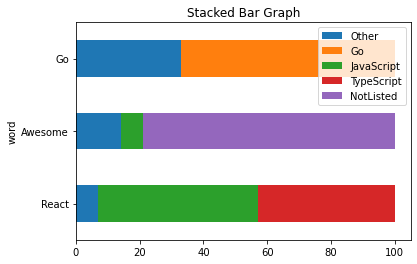

In [88]:
percentage_of_language_per_word()

In [89]:
df_acquire.head()

,repo,language,readme_contents
0,microsoft/terminal,C++,![terminal-logos](https://user-images.githubus...
1,microsoft/PowerToys,C#,# Microsoft PowerToys\n\n![Hero image for Micr...
2,huggingface/transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...
3,rust-lang/rust,Rust,# The Rust Programming Language\n\nThis is the...
4,mtdvio/every-programmer-should-know,NaN,> *[Join our community](https://metadevelopmen...


In [90]:
df_prepare.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,terminal,Other,![terminal-logos](https://user-images.githubus...,terminallogos welcome windows terminal console...,terminallogo welcom window termin consol comma...,terminallogos welcome window terminal console ...,microsoft,8152
1,PowerToys,Other,# Microsoft PowerToys\n\n![Hero image for Micr...,microsoft powertoys hero microsoft powertoys u...,microsoft powertoy hero microsoft powertoy use...,microsoft powertoys hero microsoft powertoys u...,microsoft,6486
2,transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface team rights reserve...,copyright 2020 huggingfac team right reserv li...,copyright 2020 huggingface team right reserved...,huggingface,37200
3,rust,Other,# The Rust Programming Language\n\nThis is the...,rust programming language main source code rep...,rust program languag main sourc code repositor...,rust programming language main source code rep...,rust-lang,5587
4,every programmer should know,Not Listed,> *[Join our community](https://metadevelopmen...,join community professional software developer...,join commun profession softwar develop get con...,join community professional software developer...,mtdvio,6397


In [91]:
(df_prepare.language == 'Java').value_counts(normalize = True)

False    0.918009
True     0.081991
Name: language, dtype: float64

In [92]:
language_distribution = pd.DataFrame((df_prepare.language).value_counts(normalize=True))
language_distribution = (language_distribution*100).round(1)
language_distribution = pd.DataFrame(language_distribution.language.astype(str) + '%')
language_distribution

,language
Other,33.1%
JavaScript,21.2%
Python,10.5%
Not Listed,9.4%
TypeScript,8.9%
Go,8.6%
Java,8.2%


In [93]:
df_prepare.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,terminal,Other,![terminal-logos](https://user-images.githubus...,terminallogos welcome windows terminal console...,terminallogo welcom window termin consol comma...,terminallogos welcome window terminal console ...,microsoft,8152
1,PowerToys,Other,# Microsoft PowerToys\n\n![Hero image for Micr...,microsoft powertoys hero microsoft powertoys u...,microsoft powertoy hero microsoft powertoy use...,microsoft powertoys hero microsoft powertoys u...,microsoft,6486
2,transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface team rights reserve...,copyright 2020 huggingfac team right reserv li...,copyright 2020 huggingface team right reserved...,huggingface,37200
3,rust,Other,# The Rust Programming Language\n\nThis is the...,rust programming language main source code rep...,rust program languag main sourc code repositor...,rust programming language main source code rep...,rust-lang,5587
4,every programmer should know,Not Listed,> *[Join our community](https://metadevelopmen...,join community professional software developer...,join commun profession softwar develop get con...,join community professional software developer...,mtdvio,6397


In [94]:
df_acquire.head()

,repo,language,readme_contents
0,microsoft/terminal,C++,![terminal-logos](https://user-images.githubus...
1,microsoft/PowerToys,C#,# Microsoft PowerToys\n\n![Hero image for Micr...
2,huggingface/transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...
3,rust-lang/rust,Rust,# The Rust Programming Language\n\nThis is the...
4,mtdvio/every-programmer-should-know,NaN,> *[Join our community](https://metadevelopmen...


In [95]:
df_acquire.language.value_counts()

JavaScript          145
Python               72
TypeScript           61
Go                   59
Java                 56
C++                  32
Objective-C          20
C                    19
Rust                 18
HTML                 17
Swift                15
Jupyter Notebook     13
PHP                  12
Ruby                 10
Shell                 8
C#                    8
Vue                   7
CSS                   7
Kotlin                5
Vim script            3
CoffeeScript          3
Clojure               2
PowerShell            2
Dart                  2
Batchfile             2
Vim Script            2
Markdown              2
SCSS                  2
TeX                   2
Emacs Lisp            1
Less                  1
Svelte                1
Assembly              1
CMake                 1
Haskell               1
Mustache              1
Lua                   1
Astro                 1
Elixir                1
VimL                  1
Jinja                 1
WebAssembly     

In [96]:
def split_data(df: pd.DataFrame, target: str, test_size: float = 0.15):
    '''
    Takes in a data frame and the train size
    It returns train, validate , and test data frames
    with validate being 0.05 bigger than test and train has the rest of the data.
    '''
    train, test = train_test_split(
        df, stratify=df[target], test_size=test_size, random_state=27)
    train, validate = train_test_split(train,  stratify=train[target],
                                       test_size=(
        test_size + 0.05)/(1-test_size), random_state=27)

    return train, validate, test



In [97]:
from sklearn.model_selection import train_test_split

In [101]:
train, validate, test = prepare.split_data(df, 'language')

In [102]:
def split_data(df: pd.DataFrame, target: str, test_size: float = 0.15):
    '''
    Takes in a data frame and the train size
    It returns train, validate , and test data frames
    with validate being 0.05 bigger than test and train has the rest of the data.
    '''
    train, test = train_test_split(
        df, stratify=df[target], test_size=test_size, random_state=27)
    train, validate = train_test_split(train,  stratify=train[target],
                                       test_size=(
        test_size + 0.05)/(1-test_size), random_state=27)

    return train, validate, test



In [103]:
train_x, train_y, valid_x, valid_y,test_x,test_y = m.get_features_and_target(train, validate, test)

In [104]:
train_x.sort_index()

,scaled_lemmatized_length,has_java,has_javascript,has_python,has_typescript,has_awesome,has_react,has_go
2,0.021607,False,False,False,False,False,False,False
3,0.025846,False,False,False,False,False,False,False
4,-0.000590,False,False,False,False,False,False,False
5,0.006148,False,False,False,False,False,False,False
6,0.003701,False,False,False,False,False,False,False
8,0.021352,False,False,False,False,False,False,True
9,0.004385,True,False,False,False,False,False,False
10,0.013331,True,True,False,False,False,False,False
14,0.005005,False,False,False,False,False,False,False
15,-0.000692,False,False,False,False,False,False,False


In [105]:
xg, rf, dt = m.create_models()

In [106]:
print(xg)

GradientBoostingClassifier(max_depth=9, min_samples_leaf=9, n_estimators=180,
                           random_state=27)


In [107]:
m.model_and_evaluate(train_x, train_y, dt)

0.9895470383275261

In [108]:
m.compare_models(train_x, train_y, valid_x, valid_y, dt, rf, xg)

,Decision Tree,Random Forest,Gradient Boosting
Train,0.989547,0.634146,0.972125
Validate,0.325843,0.449438,0.359551


In [109]:
train

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len,clean_title,dirty_title
26,react select,TypeScript,[![NPM](https://img.shields.io/npm/v/react-sel...,npm circleci coverage status supported thinkmi...,npm circleci coverag statu support thinkmil re...,npm circleci coverage status supported thinkmi...,JedWatson,2970,react select,react select
324,react native vector icons,JavaScript,![Vector Icons for React Native](https://cloud...,vector icons react native travis npm npm perfe...,vector icon react nativ travi npm npm perfect ...,vector icon react native travis npm npm perfec...,oblador,14588,react native vector icons,react native vector icons
35,apollo server,TypeScript,packages/server/README.md,packages readmemd,packag readmemd,package readmemd,apollographql,16,apollo,apollo server
101,bolt,Go,Bolt [![Coverage Status](https://coveralls.io/...,bolt coverage status godoc bolt pure go key va...,bolt coverag statu godoc bolt pure go key valu...,bolt coverage status godoc bolt pure go key va...,boltdb,21117,bolt,bolt
420,iris,Go,<!-- [![Black Lives Matter](https://iris-go.co...,black lives matter news underdevelopment branc...,black live matter news underdevelop branch con...,black life matter news underdevelopment branch...,kataras,4397,iris,iris
218,plaid,Other,# \[ 🚧 Work in progress 👷‍♀️⛏👷🔧️👷🔧 🚧 \] Plaid ...,work progress plaid 20 rewriting plaid using a...,work progress plaid 20 rewrit plaid use androi...,work progress plaid 20 rewriting plaid using a...,nickbutcher,2819,plaid,plaid
388,gitchain,Go,Gitchain\n========\nDecentralized P2P Git Netw...,gitchain decentralized p2p git network status ...,gitchain decentr p2p git network statu quot gi...,gitchain decentralized p2p git network status ...,gitchain,471,gitchain,gitchain
213,raylib,Other,"<img align=""left"" src=""https://github.com/rays...",raylib simple easytouse library enjoy videogam...,raylib simpl easytous librari enjoy videogam p...,raylib simple easytouse library enjoy videogam...,raysan5,3750,raylib,raylib
241,ai edu,Other,"<h1 align=""center"">微软人工智能教育与学习共建社区</h1>\n\n微软人...",microsoft ai education community aiedumicrosof...,microsoft ai educ commun aiedumicrosoft resear...,microsoft ai education community aiedumicrosof...,microsoft,236,ai edu,ai edu
10,UnblockNeteaseMusic,JavaScript,"<img src=""https://user-images.githubuserconten...",unblockneteasemusic qq joox xrealip ip http ht...,unblockneteasemus qq joox xrealip ip http http...,unblockneteasemusic qq joox xrealip ip http ht...,nondanee,1928,unblockneteasemusic,UnblockNeteaseMusic


In [ ]:
train_x

In [110]:
train.shape

(287, 10)

In [ ]:
train_x.shape

In [119]:
#correlation heat map for lemmatized_len and language*
train.corr()[['language']].sort_values(by='lammatized_len', ascending=False)

KeyError: "None of [Index(['language'], dtype='object')] are in the [columns]"

In [117]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['language']].sort_values(by='lemmatized_len', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Length of README', fontdict={'fontsize':18}, pad=16);




KeyError: "None of [Index(['language'], dtype='object')] are in the [columns]"

<Figure size 576x864 with 0 Axes>

In [114]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['language']].sort_values(by='language', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Language', fontdict={'fontsize':18}, pad=16);





KeyError: "None of [Index(['language'], dtype='object')] are in the [columns]"

<Figure size 576x864 with 0 Axes>